<a href="https://colab.research.google.com/github/tsenga2/keio-quant-macro/blob/main/hpfilter_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

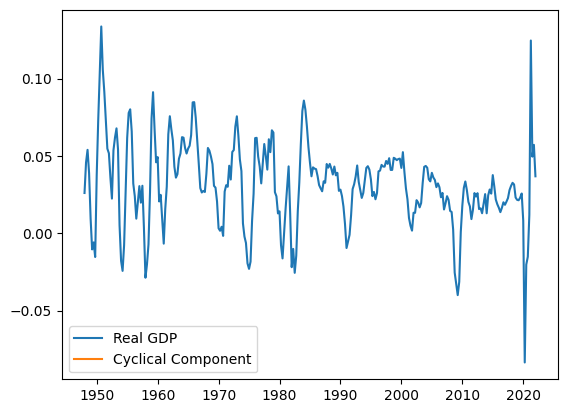

In [2]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm

# set the start and end dates for the data
start_date = '1947-01-01'
end_date = '2022-01-01'

# download the data from FRED using pandas_datareader
gdp = web.DataReader('GDPC1', 'fred', start_date, end_date)

# calculate the quarterly percent change in real GDP
gdp_pct_change = gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle, trend = sm.tsa.filters.hpfilter(gdp_pct_change, lamb=1600)

# plot the original data and the cyclical component
fig, ax = plt.subplots()
ax.plot(gdp_pct_change, label='Real GDP')
ax.plot(cycle, label='Cyclical Component')
ax.legend()
plt.show()
